### 1.项目背景：
> 互联网金融本质是金融，金融的核心在于风控。对于网贷平台来说，风控能力决定了互联网金融企业的竞争力。逾期客户画像主要在于得出未按时还款客户的整体画像，帮助企业降低坏账率，给放贷与否以及额度给与指导，另外分析各维度的不良贷款率情况，以及放贷比例，可以给企业提出一些有效的指导的参考建议。

> 此项目数据来源于拍拍货贷真实业务数据。拍拍贷平台借款端服务包括面向广大个人用户的通用性借款和其他借款。数据是从2015-01-01到2017-01-30的所有信用标的10%的样本。

> 具体字段函数参考LCIS数据字典。

### 2.理解数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
plt.rcParams['font.family'] = ['Arial Unicode MS']
plt.rcParams["axes.unicode_minus"] = False

In [2]:
data = pd.read_csv("./data/LCIS.csv",dtype={"ListingId":str})
data.head()

,ListingId,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,待还利息,标当前逾期天数,标当前状态,上次还款日期,上次还款本金,上次还款利息,下次计划还款日期,下次计划还款本金,下次计划还款利息,recorddate
0,1693100,3629,6,12.0,2015/1/28,AA,普通,否,31,男,...,0.00,0,已还清,2015/7/28,34.20,0.30,NaN,NaN,NaN,2016/12/31
1,1713229,3000,12,12.0,2015/1/30,AA,普通,是,24,男,...,0.00,0,已还清,2015/10/19,173.39,1.05,NaN,NaN,NaN,2016/12/31
2,1904026,3629,12,12.0,2015/3/7,AA,普通,否,27,男,...,0.00,0,已还清,2016/3/6,44.04,0.38,NaN,NaN,NaN,2016/12/31
3,2158281,3919,12,18.0,2015/4/14,C,普通,否,28,男,...,0.00,0,已还清,2015/5/19,92.34,0.22,NaN,NaN,NaN,2016/12/31
4,2257194,14000,12,18.0,2015/4/23,C,普通,否,46,男,...,9.92,589,逾期中,NaN,NaN,NaN,2015/5/23,7.66,1.5,2016/12/31


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292539 entries, 0 to 292538
Data columns (total 37 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ListingId   292539 non-null  object 
 1   借款金额        292539 non-null  int64  
 2   借款期限        292539 non-null  int64  
 3   借款利率        292539 non-null  float64
 4   借款成功日期      292539 non-null  object 
 5   初始评级        292539 non-null  object 
 6   借款类型        292539 non-null  object 
 7   是否首标        292539 non-null  object 
 8   年龄          292539 non-null  int64  
 9   性别          292539 non-null  object 
 10  手机认证        292539 non-null  object 
 11  户口认证        292539 non-null  object 
 12  视频认证        292539 non-null  object 
 13  学历认证        292539 non-null  object 
 14  征信认证        292539 non-null  object 
 15  淘宝认证        292539 non-null  object 
 16  历史成功借款次数    291336 non-null  float64
 17  历史成功借款金额    291336 non-null  float64
 18  总待还本金       292539 non-null  float64
 19  历史

In [4]:
data.describe()

,借款金额,借款期限,借款利率,年龄,历史成功借款次数,历史成功借款金额,总待还本金,历史正常还款期数,历史逾期还款期数,我的投资金额,...,当前还款期数,已还本金,已还利息,待还本金,待还利息,标当前逾期天数,上次还款本金,上次还款利息,下次计划还款本金,下次计划还款利息
count,292539.000000,292539.000000,292539.000000,292539.000000,291336.000000,2.913360e+05,2.925390e+05,2.925390e+05,292539.000000,292539.000000,...,292539.000000,292539.000000,292539.000000,292539.000000,292539.000000,292539.000000,270290.000000,270290.000000,182563.000000,181494.000000
mean,8516.123713,10.191974,17.783796,29.353949,2.583769,1.513134e+04,4.499622e+03,7.664124e+01,18.366290,96.347625,...,5.653215,72.086067,4.796278,24.475503,1.669001,3.185104,21.278687,0.481281,6.042533,0.584434
std,27584.913864,3.148704,3.375216,6.165157,5.081881,7.026413e+04,1.698939e+04,4.672302e+03,1256.978087,117.748925,...,11.146470,122.297594,6.482616,30.993081,2.305682,27.908310,48.777880,0.421215,4.374562,0.331167
min,100.000000,1.000000,7.000000,18.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3000.000000,6.000000,16.000000,25.000000,1.000000,1.000000e+03,0.000000e+00,0.000000e+00,0.000000,50.000000,...,2.000000,12.000000,1.560000,0.000000,0.000000,0.000000,4.220000,0.150000,4.130000,0.370000
50%,4107.000000,12.000000,18.000000,28.000000,2.000000,6.500000e+03,2.883070e+03,7.000000e+00,0.000000,50.000000,...,5.000000,28.260000,2.660000,21.540000,0.750000,0.000000,6.730000,0.440000,4.430000,0.570000
75%,7000.000000,12.000000,20.000000,32.000000,4.000000,1.369200e+04,5.890600e+03,1.500000e+01,0.000000,58.000000,...,7.000000,50.000000,4.890000,41.980000,2.910000,0.000000,16.740000,0.700000,8.120000,0.760000
max,500000.000000,24.000000,24.000000,65.000000,487.000000,3.856476e+06,1.697706e+06,1.625000e+06,524034.000000,2190.000000,...,1100.000000,2190.000000,269.600000,1100.000000,87.740000,681.000000,1413.000000,11.770000,96.900000,8.920000


### 3.数据预处理-数据清洗

In [5]:
columns = {
    "ListingId":"列表序号",
    "recorddate":"记录日期"
}
data.rename(columns=columns,inplace=True)

In [6]:
data.head()

,列表序号,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,待还利息,标当前逾期天数,标当前状态,上次还款日期,上次还款本金,上次还款利息,下次计划还款日期,下次计划还款本金,下次计划还款利息,记录日期
0,1693100,3629,6,12.0,2015/1/28,AA,普通,否,31,男,...,0.00,0,已还清,2015/7/28,34.20,0.30,NaN,NaN,NaN,2016/12/31
1,1713229,3000,12,12.0,2015/1/30,AA,普通,是,24,男,...,0.00,0,已还清,2015/10/19,173.39,1.05,NaN,NaN,NaN,2016/12/31
2,1904026,3629,12,12.0,2015/3/7,AA,普通,否,27,男,...,0.00,0,已还清,2016/3/6,44.04,0.38,NaN,NaN,NaN,2016/12/31
3,2158281,3919,12,18.0,2015/4/14,C,普通,否,28,男,...,0.00,0,已还清,2015/5/19,92.34,0.22,NaN,NaN,NaN,2016/12/31
4,2257194,14000,12,18.0,2015/4/23,C,普通,否,46,男,...,9.92,589,逾期中,NaN,NaN,NaN,2015/5/23,7.66,1.5,2016/12/31


In [7]:
miss_rate = pd.DataFrame(data.apply(lambda x: sum(x.isnull())/len(x), axis=0))
miss_rate.columns=["缺失率"]

In [8]:
miss_rate[miss_rate["缺失率"]>0]["缺失率"].apply(lambda x: format(x,".3%"))

历史成功借款次数     0.411%
历史成功借款金额     0.411%
上次还款日期       7.195%
上次还款本金       7.605%
上次还款利息       7.605%
下次计划还款日期    37.594%
下次计划还款本金    37.594%
下次计划还款利息    37.959%
记录日期         0.140%
Name: 缺失率, dtype: object

#### 3.1基于缺失数据，分析缺失原因

In [9]:
# 3.1.1 分析：下次计划还款日期、下次计划还款本金、下次计划还款利息缺失较多的原因  
data[data["下次计划还款利息"].isnull()].head(10) # 观察标当前状态

,列表序号,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,待还利息,标当前逾期天数,标当前状态,上次还款日期,上次还款本金,上次还款利息,下次计划还款日期,下次计划还款本金,下次计划还款利息,记录日期
0,1693100,3629,6,12.0,2015/1/28,AA,普通,否,31,男,...,0.0,0,已还清,2015/7/28,34.20,0.30,NaN,NaN,NaN,2016/12/31
1,1713229,3000,12,12.0,2015/1/30,AA,普通,是,24,男,...,0.0,0,已还清,2015/10/19,173.39,1.05,NaN,NaN,NaN,2016/12/31
2,1904026,3629,12,12.0,2015/3/7,AA,普通,否,27,男,...,0.0,0,已还清,2016/3/6,44.04,0.38,NaN,NaN,NaN,2016/12/31
3,2158281,3919,12,18.0,2015/4/14,C,普通,否,28,男,...,0.0,0,已还清,2015/5/19,92.34,0.22,NaN,NaN,NaN,2016/12/31
5,2272036,40000,6,15.0,2015/4/29,B,电商,是,32,男,...,0.0,0,已还清,2015/10/27,35.43,0.42,NaN,NaN,NaN,2016/12/31
6,2315058,3200,3,10.0,2015/4/29,AA,普通,否,25,男,...,0.0,0,已还清,2015/7/17,134.45,1.11,NaN,NaN,NaN,2016/12/31
7,2332817,3000,6,12.0,2015/5/6,AA,普通,是,38,男,...,0.0,0,已还清,2015/11/6,8.74,0.05,NaN,NaN,NaN,2016/12/31
8,2365175,4260,7,12.0,2015/5/6,AA,普通,否,25,男,...,0.0,0,已还清,2015/8/5,29.59,0.00,NaN,NaN,NaN,2016/12/31
9,2370723,11987,12,16.0,2015/5/7,B,其他,否,33,女,...,0.0,0,已还清,2016/1/22,35.16,0.18,NaN,NaN,NaN,2016/12/31
10,2526671,5115,12,12.0,2015/5/23,AA,普通,否,34,男,...,0.0,0,已还清,2016/5/22,3.58,0.00,NaN,NaN,NaN,2016/12/31


In [10]:
data[data["下次计划还款利息"].isnull()]["标当前状态"].value_counts()[:10]


已还清      109168
正常还款中       674
0           409
3.56         26
5            26
0.7          25
5.76         25
2.35         24
4.25         24
2.92         21
Name: 标当前状态, dtype: int64

In [11]:
# 结论：分析缺失值较大的三个字段，由于标当前状态大部分为已还清，所以缺失很正常

In [12]:
# 3.1.2 分析：上次还款日期、上次还款本金、上次还款利息缺失的原因

data[data["上次还款日期"].isnull()].iloc[:,-9:]

,标当前逾期天数,标当前状态,上次还款日期,上次还款本金,上次还款利息,下次计划还款日期,下次计划还款本金,下次计划还款利息,记录日期
4,589,逾期中,NaN,NaN,NaN,2015/5/23,7.66,1.50,2016/12/31
133,0,正常还款中,NaN,NaN,NaN,2017/1/4,4.13,1.01,2016/12/31
134,0,正常还款中,NaN,NaN,NaN,2017/1/5,9.27,0.96,2016/12/31
135,0,正常还款中,NaN,NaN,NaN,2017/1/6,4.13,1.01,2016/12/31
136,0,正常还款中,NaN,NaN,NaN,2017/1/7,2.45,0.48,2016/12/31
...,...,...,...,...,...,...,...,...,...
291539,0,正常还款中,NaN,NaN,NaN,2016/10/27,3.83,0.75,2016/9/30
291540,0,正常还款中,NaN,NaN,NaN,2016/10/28,3.83,0.75,2016/9/30
291541,0,正常还款中,NaN,NaN,NaN,2016/10/29,8.02,0.75,2016/9/30
291614,232,逾期中,NaN,NaN,NaN,2016/7/12,8.02,0.75,2017/2/28


In [13]:
# 结论：通过分析数据可知：1.未到首次还款日期；2.客户当前处于逾期中，所以没有上次还款信息

In [14]:
# 3.1.3 分析：历史成功借款次数、历史成功借款金额缺失的原因

data[data["历史成功借款金额"].isnull()]["是否首标"].value_counts()

否    873
是    330
Name: 是否首标, dtype: int64

In [15]:
# 结论：分析数据可知：该项数据缺失是由于首次贷款造成的。

In [16]:
# 3.1.4 分析：记录日期缺失

data[data["记录日期"].isnull()]

,列表序号,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,待还利息,标当前逾期天数,标当前状态,上次还款日期,上次还款本金,上次还款利息,下次计划还款日期,下次计划还款本金,下次计划还款利息,记录日期
118020,1625423,4140,3,12.0,2015/1/8,AA,普通,否,36,男,...,0.84,0,0,0,NaN,NaN,16.84,0.00,NaN,NaN
118021,1678223,4921,12,12.0,2015/1/23,AA,普通,否,27,女,...,9.68,0,0,0,NaN,NaN,13.07,0.07,NaN,NaN
118022,1710623,5728,12,12.0,2015/2/1,AA,普通,否,28,女,...,33.04,0,0,0,NaN,NaN,44.06,0.36,NaN,NaN
118024,1993823,3869,12,12.0,2015/3/23,AA,普通,否,29,男,...,20.99,0,0,0,NaN,NaN,298.93,0.00,NaN,NaN
118025,1994223,14053,12,18.0,2015/3/17,D,其他,否,51,男,...,9.92,0,0,0,NaN,NaN,9.1,0.06,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288446,9516904,20000,12,18.0,2016/3/12,F,普通,否,26,女,...,3.68,0,0,0,NaN,NaN,26.15,0.05,NaN,NaN
288449,9598504,10000,12,20.0,2016/3/12,C,普通,否,23,男,...,1.52,0,0,0,NaN,NaN,46.21,0.68,NaN,NaN
288470,13571304,516,6,18.0,2016/6/9,B,APP闪电,否,30,男,...,1.38,0,0,0,NaN,NaN,33.83,0.00,NaN,NaN
288474,14349304,799,12,18.0,2016/6/22,B,APP闪电,否,25,男,...,5.00,0,0,0,NaN,NaN,4.52,0.06,NaN,NaN


In [17]:
data.columns

Index(['列表序号', '借款金额', '借款期限', '借款利率', '借款成功日期', '初始评级', '借款类型', '是否首标', '年龄',
       '性别', '手机认证', '户口认证', '视频认证', '学历认证', '征信认证', '淘宝认证', '历史成功借款次数',
       '历史成功借款金额', '总待还本金', '历史正常还款期数', '历史逾期还款期数', '我的投资金额', '当前到期期数',
       '当前还款期数', '已还本金', '已还利息', '待还本金', '待还利息', '标当前逾期天数', '标当前状态', '上次还款日期',
       '上次还款本金', '上次还款利息', '下次计划还款日期', '下次计划还款本金', '下次计划还款利息', '记录日期'],
      dtype='object')

In [18]:
data[data["记录日期"].isnull()][['手机认证', '户口认证', '视频认证', '学历认证', '征信认证', '淘宝认证']]

,手机认证,户口认证,视频认证,学历认证,征信认证,淘宝认证
118020,已婚,初中及以下,成功认证,成功认证,未成功认证,未成功认证
118021,已婚,高中,未成功认证,未成功认证,未成功认证,未成功认证
118022,已婚,本科,成功认证,未成功认证,未成功认证,未成功认证
118024,已婚,本科,成功认证,未成功认证,未成功认证,成功认证
118025,已婚,高中,成功认证,未成功认证,未成功认证,未成功认证
...,...,...,...,...,...,...
288446,未婚,本科,成功认证,成功认证,未成功认证,未成功认证
288449,未婚,中专,成功认证,成功认证,未成功认证,未成功认证
288470,其他,中专,未成功认证,未成功认证,未成功认证,未成功认证
288474,未婚,高中,未成功认证,未成功认证,未成功认证,未成功认证


In [19]:
# 发现：记录时间缺失的数据：手机认证等信息存在错误，所以将这些数据删掉。

In [20]:
data.dropna(subset=["记录日期"], how="any", inplace=True)

#### 3.2 重复值的处理

In [21]:
data[data.duplicated()]

,列表序号,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,待还利息,标当前逾期天数,标当前状态,上次还款日期,上次还款本金,上次还款利息,下次计划还款日期,下次计划还款本金,下次计划还款利息,记录日期
172327,1638462,12716,12,18.0,2015/1/8,C,其他,否,28,男,...,0.00,0,已还清,2015/8/19,23.71,0.09,NaN,NaN,NaN,2016/9/30
172328,1655662,3900,10,12.0,2015/1/19,AA,普通,否,26,男,...,0.00,0,已还清,2015/11/19,52.31,0.48,NaN,NaN,NaN,2016/9/30
172329,1730462,3000,12,12.0,2015/1/28,AA,普通,是,37,男,...,0.00,0,已还清,2016/1/11,39.63,0.35,NaN,NaN,NaN,2016/9/30
172330,1800062,3500,12,12.0,2015/2/15,AA,普通,否,32,女,...,0.00,0,已还清,2016/1/14,12.31,0.06,NaN,NaN,NaN,2016/9/30
172331,1919662,5048,12,12.0,2015/3/7,AA,普通,否,32,男,...,0.00,0,已还清,2015/8/6,264.86,0.00,NaN,NaN,NaN,2016/9/30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172428,20288462,5123,6,18.0,2016/9/19,B,APP闪电,否,32,女,...,2.65,0,正常还款中,NaN,NaN,NaN,2016/10/19,8.02,0.75,2016/9/30
172429,20427662,2337,6,18.0,2016/9/21,B,APP闪电,否,30,女,...,2.71,0,正常还款中,NaN,NaN,NaN,2016/10/21,8.18,0.77,2016/9/30
172430,20436062,2726,6,16.0,2016/9/21,A,APP闪电,否,23,男,...,2.35,0,正常还款中,NaN,NaN,NaN,2016/10/21,8.05,0.67,2016/9/30
172431,20480062,7000,12,18.0,2016/9/22,B,APP闪电,否,27,女,...,0.00,0,已还清,2016/9/24,50.00,0.07,NaN,NaN,NaN,2016/9/30


In [22]:
data.drop_duplicates(inplace=True)

#### 3.3 异常值处理-->对每一个可能存在异常的字段进行分析

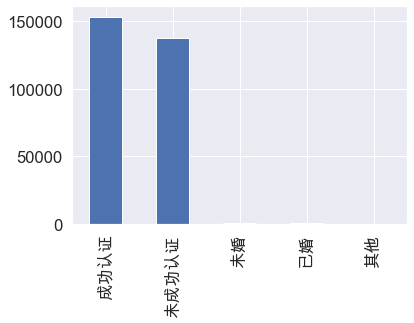

In [23]:
data["手机认证"].value_counts().plot(kind="bar")

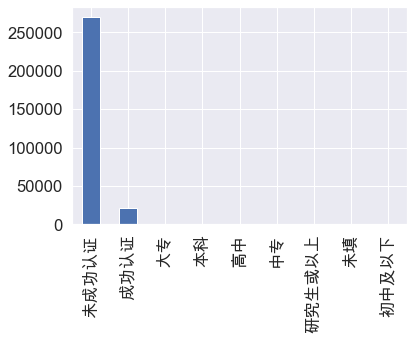

In [24]:
data["户口认证"].value_counts().plot(kind="bar")

In [25]:
# 剔除错误的数据
data = data[(data["手机认证"]=="成功认证")|(data["手机认证"]=="未成功认证")]

In [26]:
data["户口认证"].value_counts()

未成功认证    269709
成功认证      21521
Name: 户口认证, dtype: int64

### 4.构建模型，进行数据分析，对逾期客户进行画像

#### 4.1 不同性别用户的放贷比例与逾期关系

In [27]:
df_gender = pd.pivot_table(data=data, columns=["标当前状态"],index=["性别"],values="列表序号",aggfunc=np.size)
df_gender

标当前状态,已还清,正常还款中,逾期中
性别,,,
女,29881,68967,2857
男,79248,103538,6739


In [28]:
df_gender["借款笔数占比"] = df_gender.apply(np.sum,axis=1)/df_gender.sum().sum()

In [29]:
df_gender["逾期笔数占比"] = df_gender["逾期中"]/df_gender.sum(axis=1)

In [30]:
df_gender

标当前状态,已还清,正常还款中,逾期中,借款笔数占比,逾期笔数占比
性别,,,,,
女,29881,68967,2857,0.349226,0.028091
男,79248,103538,6739,0.650774,0.035557


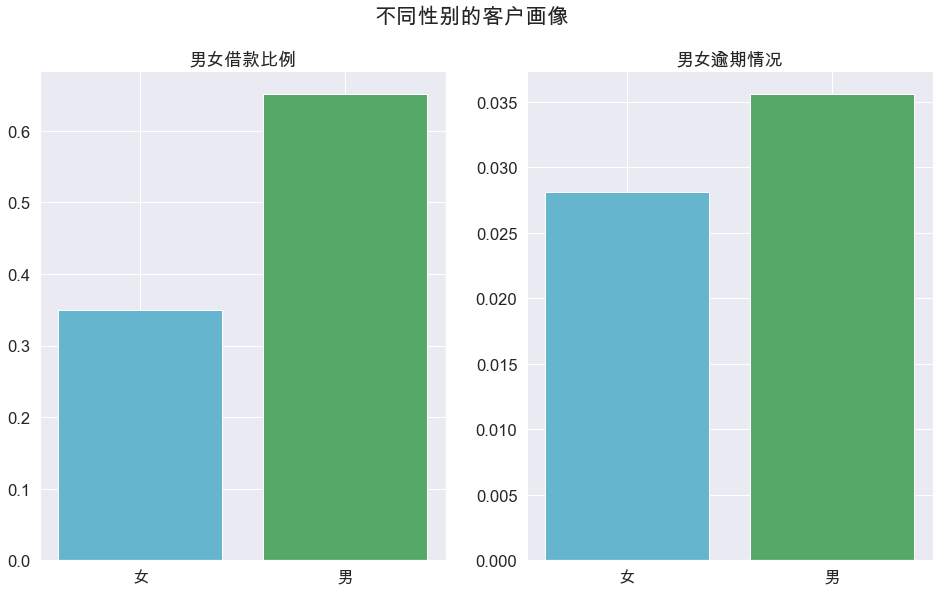

In [31]:
plt.figure(figsize=(16,9))
plt.subplot(121)
plt.bar(x=df_gender.index,height=df_gender["借款笔数占比"],color=["c","g"])
plt.title("男女借款比例")

plt.subplot(122)
plt.bar(x=df_gender.index,height=df_gender["逾期笔数占比"],color=["c","g"])
plt.title("男女逾期情况")
plt.suptitle("不同性别的客户画像")
plt.show()

In [32]:
# 根据图可知：男性的借款比例将近女性的2倍，且男性逾期比例高于女性，所以相对来说，女性逾期风险较小。

#### 4.2 不同年龄用户的放贷比例与逾期关系

In [33]:
df_age = pd.DataFrame(data.groupby("年龄")["借款金额"].sum())

In [34]:
df_age.head()

,借款金额
年龄,
18,674385
19,3661457
20,7744701
21,18611341
22,52258221


In [35]:
df_age["借款金额累计"] = df_age["借款金额"].cumsum()

In [36]:
df_age.head()

,借款金额,借款金额累计
年龄,,
18,674385,674385
19,3661457,4335842
20,7744701,12080543
21,18611341,30691884
22,52258221,82950105


In [37]:
df_age["借款金额累计占比"] = df_age["借款金额累计"]/df_age["借款金额"].sum()

In [38]:
df_age

,借款金额,借款金额累计,借款金额累计占比
年龄,,,
18,674385,674385,0.000272
19,3661457,4335842,0.001748
20,7744701,12080543,0.004871
21,18611341,30691884,0.012376
22,52258221,82950105,0.033448
23,98477249,181427354,0.073157
24,113366470,294793824,0.118870
25,133387266,428181090,0.172656
26,175863100,604044190,0.243569


In [39]:
# 进行二八理论分析
index_num = df_age[df_age["借款金额累计占比"]>0.8].index[0]

In [40]:
# 通过分析可知，超过80%的贷款放给年龄低于36岁的用户

In [41]:
# 计算累计占比
cum_percent = df_age.loc[index_num,"借款金额累计占比"]

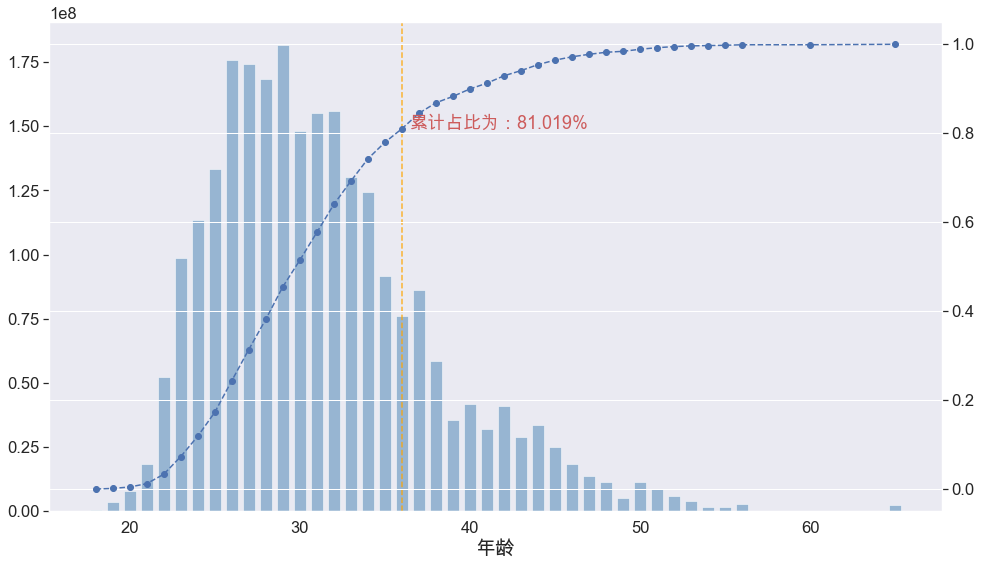

In [42]:
plt.figure(figsize=(16,9))
plt.bar(x=df_age.index,height=df_age["借款金额"],color="steelblue",alpha=0.5,width=0.7)
plt.xlabel("年龄", fontsize=20)
# 添加平行于x轴的辅助线
plt.axvline(x=index_num,color="orange",linestyle="--",alpha=0.8)

df_age["借款金额累计占比"].plot(style="--ob", secondary_y=True)

# 添加注释
plt.text(index_num+0.4, cum_percent, "累计占比为：%.3f%%"%(cum_percent*100), color="indianred")
plt.show()

In [43]:
# 由图可知：36岁用户累计占比高达81%，而55岁以上用户，放款金额非常少。

#### 4.3 不同年龄段用户的贷款比例

In [44]:
# 4.3.1 不同年龄段坏账的情况
bins = [17,24,30,36,42,48,54,65]
data["age_bin"] = pd.cut(data["年龄"],bins=bins, right=True) 

In [45]:
df_age = pd.pivot_table(data=data, columns="标当前状态", index="age_bin",
                        values="列表序号",aggfunc=np.size)

In [46]:
df_age

标当前状态,已还清,正常还款中,逾期中
age_bin,,,
"(17, 24]",21687,38187,2092
"(24, 30]",47594,79216,4023
"(30, 36]",24645,35916,2068
"(36, 42]",9267,11950,881
"(42, 48]",4631,5673,427
"(48, 54]",1225,1467,94
"(54, 65]",80,96,11


In [47]:
df_age["借款笔数"] = df_age.sum(axis=1)

In [48]:
df_age["借款笔数分布"] = df_age["借款笔数"]/df_age["借款笔数"].sum()
df_age["逾期占比"] = df_age["逾期中"]/df_age["借款笔数"]

In [49]:
df_age

标当前状态,已还清,正常还款中,逾期中,借款笔数,借款笔数分布,逾期占比
age_bin,,,,,,
"(17, 24]",21687,38187,2092,61966,0.212773,0.033760
"(24, 30]",47594,79216,4023,130833,0.449243,0.030749
"(30, 36]",24645,35916,2068,62629,0.215050,0.033020
"(36, 42]",9267,11950,881,22098,0.075878,0.039868
"(42, 48]",4631,5673,427,10731,0.036847,0.039791
"(48, 54]",1225,1467,94,2786,0.009566,0.033740
"(54, 65]",80,96,11,187,0.000642,0.058824


In [50]:
df_age["借款笔数分布%"] = df_age["借款笔数分布"].apply(lambda x: format(x,".3%"))
df_age["逾期占比%"] = df_age["逾期占比"].apply(lambda x: format(x,".3%"))

In [51]:
df_age

标当前状态,已还清,正常还款中,逾期中,借款笔数,借款笔数分布,逾期占比,借款笔数分布%,逾期占比%
age_bin,,,,,,,,
"(17, 24]",21687,38187,2092,61966,0.212773,0.033760,21.277%,3.376%
"(24, 30]",47594,79216,4023,130833,0.449243,0.030749,44.924%,3.075%
"(30, 36]",24645,35916,2068,62629,0.215050,0.033020,21.505%,3.302%
"(36, 42]",9267,11950,881,22098,0.075878,0.039868,7.588%,3.987%
"(42, 48]",4631,5673,427,10731,0.036847,0.039791,3.685%,3.979%
"(48, 54]",1225,1467,94,2786,0.009566,0.033740,0.957%,3.374%
"(54, 65]",80,96,11,187,0.000642,0.058824,0.064%,5.882%


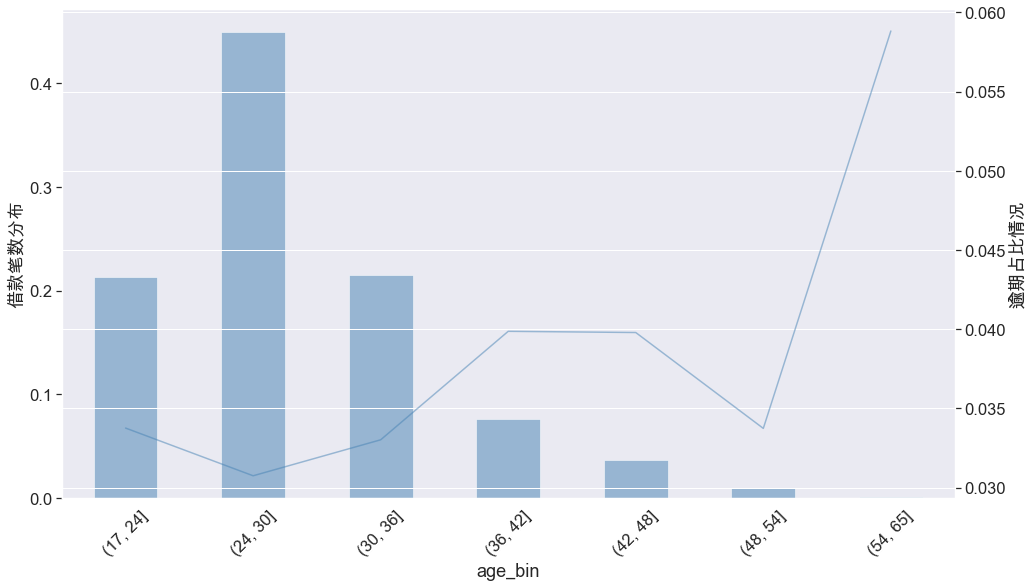

In [52]:
plt.figure(figsize=(16,9))
df_age["借款笔数分布"].plot(kind="bar", rot=45,color="steelblue",alpha=0.5)
plt.xlabel("年龄分段情况")
plt.ylabel("借款笔数分布")

df_age["逾期占比"].plot(secondary_y=True, rot=45,color="steelblue",alpha=0.5)
plt.ylabel("逾期占比情况")
plt.grid(True)
plt.show()

In [53]:
# 由图可知：年龄段在25-30岁之间的借款笔数最多占44.9%左右，其逾期占比最低；而55岁以上的用户逾期占比较高，因此55岁用户需重点关注

#### 4.4 不同学历客户的逾期表现

In [54]:
df_edu = pd.pivot_table(data=data, columns="标当前状态", index="学历认证",
                        values="列表序号",aggfunc=np.size)

In [55]:
data["学历认证"].value_counts()
# 认为：成功认证-->大学以上学历，未成功认证-->大学以下学历，初高中

成功认证     148126
未成功认证    143104
Name: 学历认证, dtype: int64

In [56]:
df_edu

标当前状态,已还清,正常还款中,逾期中
学历认证,,,
成功认证,41431,102676,4019
未成功认证,67698,69829,5577


In [57]:
df_edu["借款笔数"] = df_edu.sum(axis=1)

In [58]:
df_edu["借款笔数占比"] = df_edu["借款笔数"]/df_edu["借款笔数"].sum()

In [59]:
df_edu["逾期占比"] = df_edu["逾期中"]/df_edu["借款笔数"]

In [60]:
df_edu

标当前状态,已还清,正常还款中,逾期中,借款笔数,借款笔数占比,逾期占比
学历认证,,,,,,
成功认证,41431,102676,4019,148126,0.508622,0.027132
未成功认证,67698,69829,5577,143104,0.491378,0.038972


In [61]:
# 分析可知： 成功认证的人群的逾期占比低于为成功认证的人群

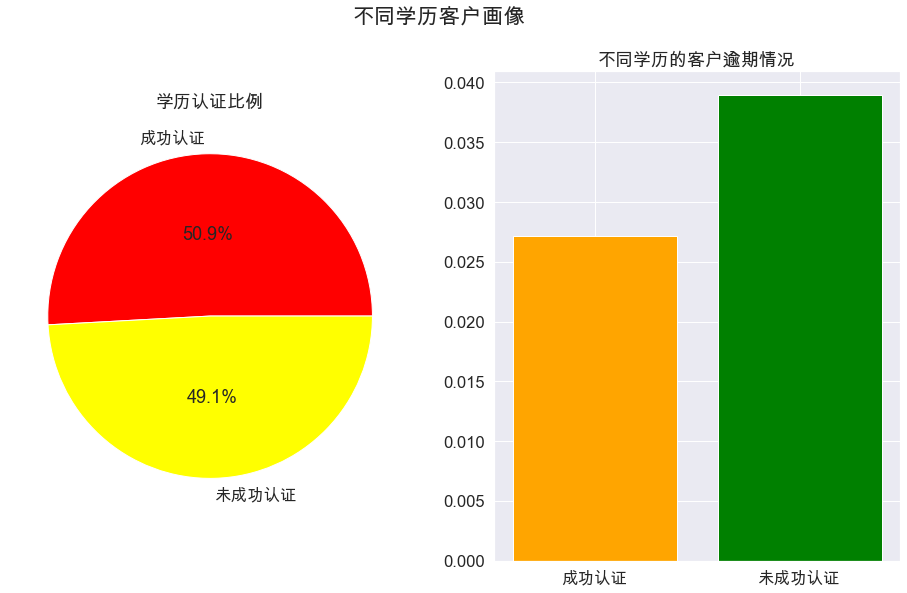

In [62]:
plt.figure(figsize=(16,9))
plt.subplot(121)
plt.pie(x=df_edu["借款笔数占比"], labels=["成功认证","未成功认证"],
       colors=["red","yellow"],autopct="%.1f%%",
       pctdistance=0.5, labeldistance=1.1)
plt.title("学历认证比例")

plt.subplot(122)
plt.bar(x=df_edu.index, height=df_edu["逾期占比"],color=["orange","green"])
plt.title("不同学历的客户逾期情况")

plt.suptitle("不同学历客户画像")
plt.show()

#### 4.5 对其他不同字段与逾期关系分析

In [63]:
data.columns

Index(['列表序号', '借款金额', '借款期限', '借款利率', '借款成功日期', '初始评级', '借款类型', '是否首标', '年龄',
       '性别', '手机认证', '户口认证', '视频认证', '学历认证', '征信认证', '淘宝认证', '历史成功借款次数',
       '历史成功借款金额', '总待还本金', '历史正常还款期数', '历史逾期还款期数', '我的投资金额', '当前到期期数',
       '当前还款期数', '已还本金', '已还利息', '待还本金', '待还利息', '标当前逾期天数', '标当前状态', '上次还款日期',
       '上次还款本金', '上次还款利息', '下次计划还款日期', '下次计划还款本金', '下次计划还款利息', '记录日期',
       'age_bin'],
      dtype='object')

In [64]:
def trans(data,ind,title,col="标当前状态"):
    df = pd.pivot_table(data=data, columns=col, index=ind,
                        values="列表序号",aggfunc=np.size)
    df["借款笔数"] = df.apply(np.sum,axis=1)
    df["借款笔数占比"] = df["借款笔数"]/df["借款笔数"].sum()
    df["逾期占比"] = df["逾期中"]/df["借款笔数"]
    
    plt.figure(figsize=(16,9))
    plt.subplot(121)
    plt.pie(x=df["借款笔数占比"], labels=["成功认证","未成功认证"],
           colors=["red","yellow"],autopct="%.1f%%",
           pctdistance=0.5, labeldistance=1.1)
    plt.title("%s比例"%title)

    plt.subplot(122)
    plt.bar(x=df.index, height=df["逾期占比"],color=["orange","green"])
    plt.title("不同%s的客户逾期情况"%title)

    plt.suptitle("不同%s客户画像"%title)
    plt.show()
    
    return df

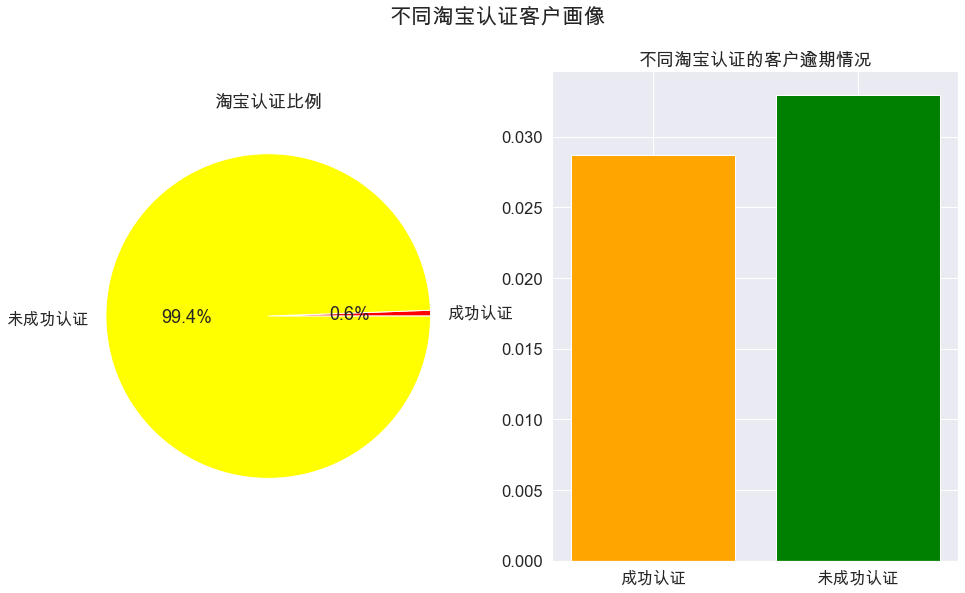

标当前状态,已还清,正常还款中,逾期中,借款笔数,借款笔数占比,逾期占比
淘宝认证,,,,,,
成功认证,1073,549,48,1670,0.005734,0.028743
未成功认证,108056,171956,9548,289560,0.994266,0.032974


In [65]:
trans(data,"淘宝认证","淘宝认证")

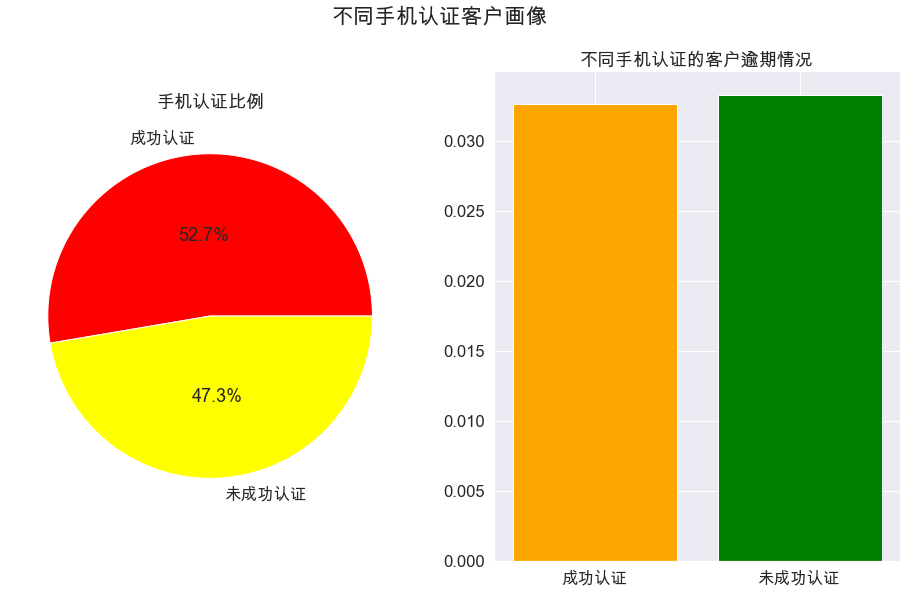

标当前状态,已还清,正常还款中,逾期中,借款笔数,借款笔数占比,逾期占比
手机认证,,,,,,
成功认证,73931,74458,5006,153395,0.526714,0.032635
未成功认证,35198,98047,4590,137835,0.473286,0.033301


In [66]:
trans(data,"手机认证","手机认证")

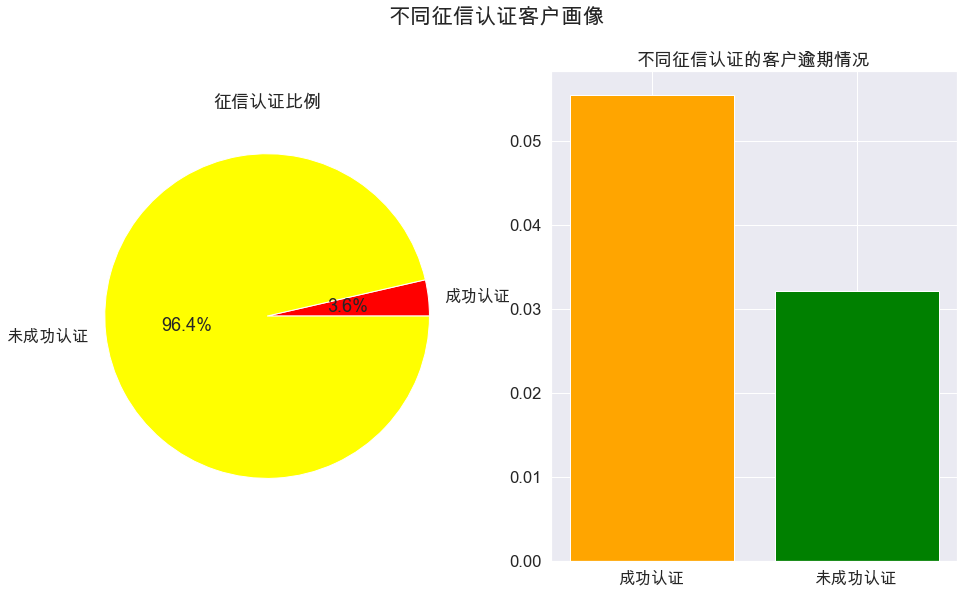

标当前状态,已还清,正常还款中,逾期中,借款笔数,借款笔数占比,逾期占比
征信认证,,,,,,
成功认证,4093,5782,580,10455,0.035899,0.055476
未成功认证,105036,166723,9016,280775,0.964101,0.032111


In [67]:
trans(data,"征信认证","征信认证")

In [68]:
# 观察征信认证，可知，成功认证人群的逾期占比大于未成功认证，猜测可能出现坏账！！！

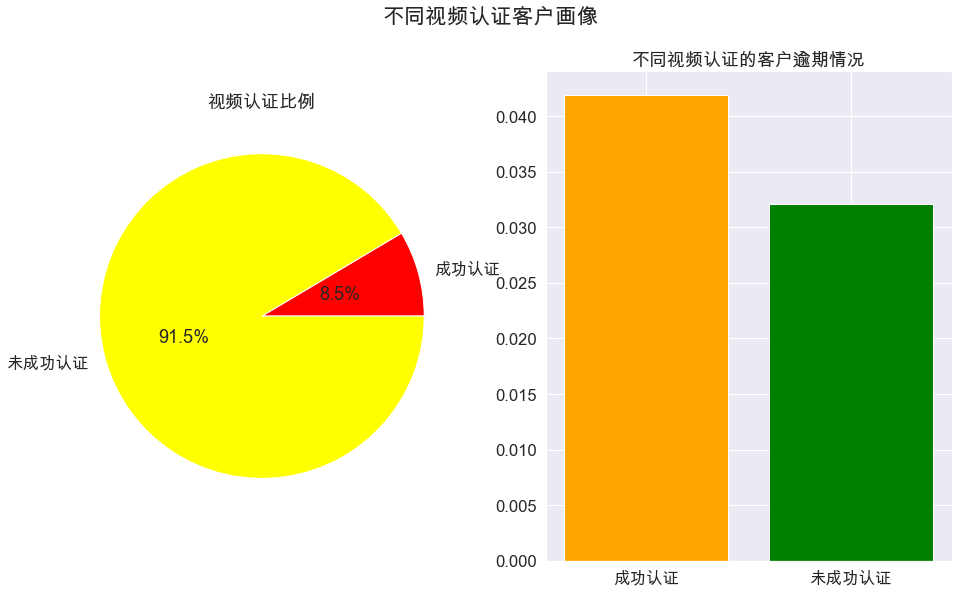

标当前状态,已还清,正常还款中,逾期中,借款笔数,借款笔数占比,逾期占比
视频认证,,,,,,
成功认证,15490,8302,1041,24833,0.085269,0.041920
未成功认证,93639,164203,8555,266397,0.914731,0.032114


In [69]:
trans(data,"视频认证","视频认证")

### 5.总结

> 1.在性别差异方面，男性客户借款是女性借款人数近两倍，逾期表现男性高于女性，男性坏账率高于女性，符合实际情况。

> 2.在学历方面，学历认证成功的人群逾期率略低于未进行学历认证的客户。

> 3.在年龄分布分析，36岁以下的人群占平台借款人群的80%左右，即36岁左右的人群，是平台借款的主力军；25-30间借款笔数高达45%，且这类用户逾期占比也较低，只有%3.07，这类用户属于优质用户，因此可以针对该类人群适当增大营销，尽可能吸引该类人群，为平台增加业务量；55岁以上的客户逾期占比较高，针对这部分客户，需严格审核；

> 4.重点关注55岁以上，大专以下学历，未进行认证的需严格审核；
